## Deuflhard Function

In [1]:
# Globtim Notebook Setup - Universal Header Cell
# This cell automatically detects your environment and sets up the appropriate configuration
# No editing required - works from any location in the project

include(joinpath(dirname(Base.find_package("Globtim")), "..", ".globtim", "notebook_setup.jl"))

Environment detected: local
Setting up local development environment...


  Activating project at `~/globtim/environments/local`


Loading CairoMakie...
CairoMakie activated for high-quality plots
GLMakie available for interactive plots
Loading Globtim from main project...
Globtim loaded successfully!
Ready for local development!
Available: Full plotting, interactive development tools
Switch plotting: GLMakie.activate!() for interactive plots


In [2]:
# using CairoMakie
# CairoMakie.activate!()

In [3]:
# Constants and Parameters
const n, a, b = 2, 8, 5
f = Deuflhard # Objective function

Deuflhard (generic function with 1 method)

In [4]:
d = 8 # Initial Degree 
SMPL = 100 # Number of samples
center = [0.0, 0.0]
TR = test_input(f,
                dim=n,
                center=[0.0, 0.0],
                GN=SMPL,
                sample_range=[1.2, 1.5]
                )
pol_cheb = Constructor(TR, d, basis=:chebyshev)
pol_lege = Constructor(TR, d, basis=:legendre);


current L2-norm: 21.42422074308984
current L2-norm: 15.108014624778521


In [5]:
@polyvar(x[1:n]) # Define polynomial ring 
real_pts_cheb = solve_polynomial_system(
    x, n, d, pol_cheb.coeffs;
    basis=pol_cheb.basis,
    precision=pol_cheb.precision,
    normalized=false,
    power_of_two_denom=pol_cheb.power_of_two_denom
)

real_pts_lege = solve_polynomial_system(
    x, n, d, pol_lege.coeffs;
    basis=pol_lege.basis,
    precision=pol_lege.precision,
    normalized=true)

df_cheb = process_crit_pts(real_pts_cheb, f, TR)
df_lege = process_crit_pts(real_pts_lege, f, TR)

Tracking 49 paths...   4%|█▎                            |  ETA: 0:01:15



Tracking 49 paths... 100%|██████████████████████████████| Time: 0:00:03
                   # paths tracked: 49
   # non-singular solutions (real): 49 (13)
       # singular endpoints (real): 0 (0)
          # total solutions (real): 49 (13)
Tracking 49 paths...   4%|█▎                            |  ETA: 0:00:19



Tracking 49 paths... 100%|██████████████████████████████| Time: 0:00:00
                   # paths tracked: 49
   # non-singular solutions (real): 49 (21)
       # singular endpoints (real): 0 (0)
          # total solutions (real): 49 (21)


Row,x1,x2,z
,Float64,Float64,Float64
1,0.576934,1.12996,10.8937
2,-0.546579,1.14957,4.35653
3,1.05998,0.716852,11.3054
4,0.735304,0.868961,7.18343
5,-0.728276,0.833521,0.205883
6,-2.74365e-17,-1.64467e-15,4.0
7,-0.735304,-0.868961,7.18343
8,-1.05998,-0.716852,11.3054
9,0.499227,-0.398524,2.27712


In [6]:
using Optim
df_cheb, df_min_cheb = analyze_critical_points(f, df_cheb, TR, tol_dist=0.001)
df_lege, df_min_lege = analyze_critical_points(f, df_lege, TR, tol_dist=0.001);

Processing point 1 of 13
Optimization has converged within bounds: ✓
Processing point 2 of 13
Optimization has converged within bounds: ✓
Processing point 3 of 13
Optimization has converged within bounds: ✓
Processing point 4 of 13
Optimization has converged within bounds: ✓
Processing point 5 of 13
Optimization has converged within bounds: ✓
Processing point 6 of 13
Optimization has converged within bounds: ✓
Processing point 7 of 13
Optimization has converged within bounds: ✓
Processing point 8 of 13
Optimization has converged within bounds: ✓
Processing point 9 of 13
Optimization has converged within bounds: ✓
Processing point 10 of 13
Optimization has converged within bounds: ✓
Processing point 11 of 13
Optimization has converged within bounds: ✓
Processing point 12 of 13
Optimization has converged within bounds: ✓
Processing point 13 of 13
Optimization has converged within bounds: ✓

=== Computing Enhanced Statistics ===
Computing spatial regions...
Clustering function values...
C

In [15]:
# Load CairoMakie to enable cairo_plot_polyapprox_levelset function
using CairoMakie
CairoMakie.activate!()

# Verify the function is now available
println("CairoMakie loaded - cairo_plot_polyapprox_levelset should now be available")

# fig_1 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true, figure_size=(800, 800))

CairoMakie loaded - cairo_plot_polyapprox_levelset should now be available


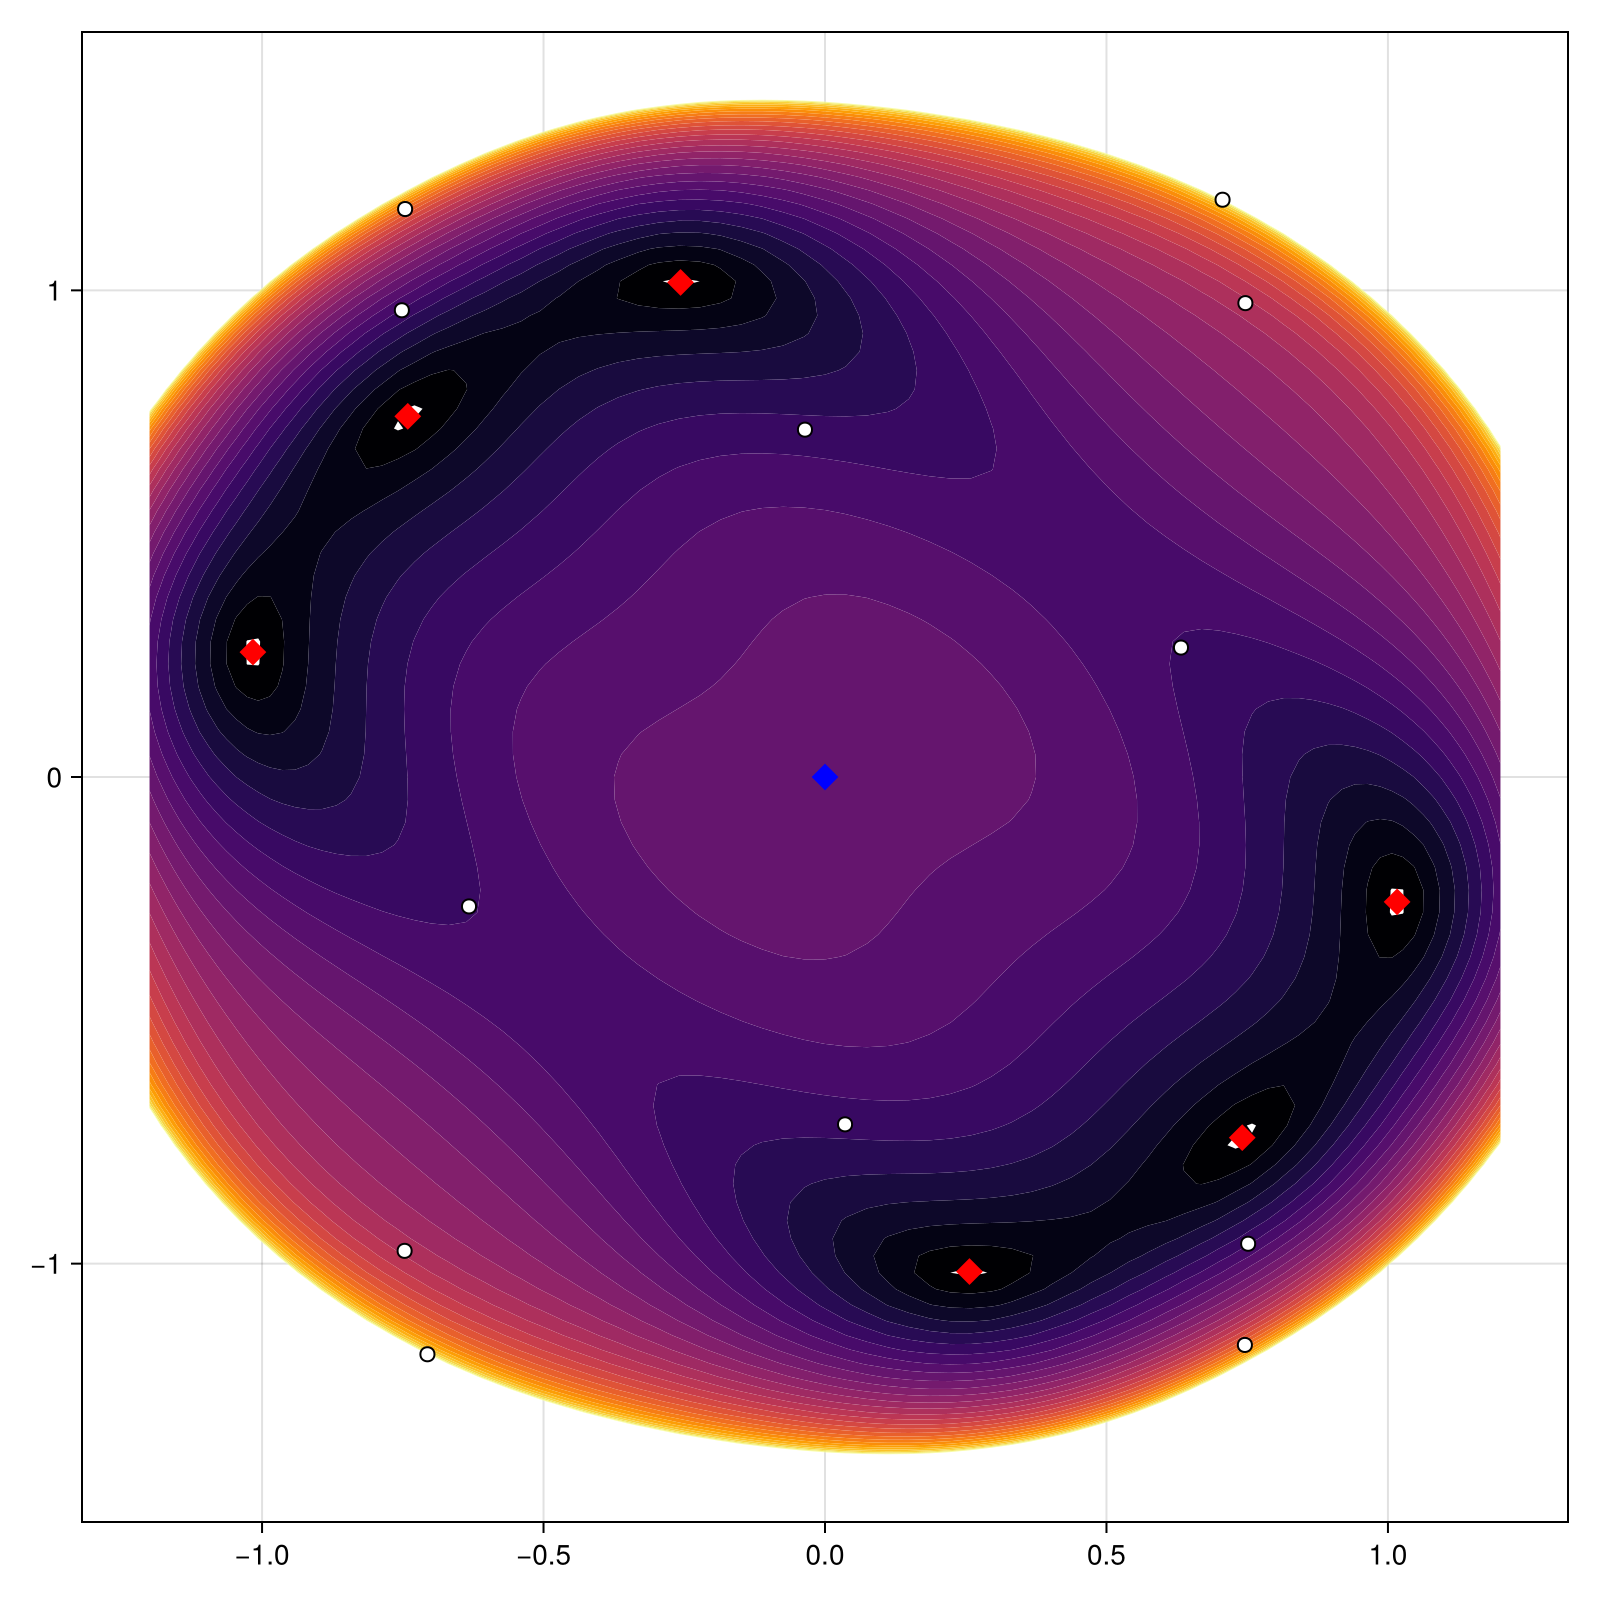

In [16]:
fig_1 = Globtim.cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true, figure_size=(800, 800))

In [ ]:
fig_2 = Globtim.cairo_plot_polyapprox_levelset(pol_lege, TR, df_lege, df_min_lege, chebyshev_levels=false, figure_size = (800, 800))

In [10]:
# Commented out save command
# save("Deuflhard_w_22.pdf", fig_1)

In [11]:
# Commented out save command
# save("deuflhard_cheb_22_3d_1.png", fig_3d)
# GLMakie.closeall()